In [1818]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from IPython.display import Javascript
import ipywidgets as widgets

#path. to datafile
p2df="/Users/denwolper/Desktop/Data_Extract_From_World_Development_Indicators vvishn.xlsx"
##################

In [1819]:
tb=widgets.ToggleButton(
    value=True,
    description='With Groups',
    disabled=False,
    button_style='info', 
    tooltip='Description',
    icon='check' 
)

df=pn.read_excel(p2df)
def on_button_clicked(value):
    global df
    if value['new']: 
        tb.description='With Groups'
        display(Javascript("Jupyter.notebook.execute_all_cells()"))
    else: 
        tb.description='No Groups'
        df=pn.read_excel(p2df)
        df.drop(df[-201:].index, inplace=True)
        display(Javascript("Jupyter.notebook.execute_cells([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])"))

display(tb)
pn.set_option('display.max_columns', None)
pn.set_option('display.max_rows', 70)
tb.observe(on_button_clicked, names='value')
df0=pn.read_excel(p2df)

ToggleButton(value=True, button_style='info', description='With Groups', icon='check', tooltip='Description')

<IPython.core.display.Javascript object>

In [1841]:
df.columns=list(map(lambda x: x[:4] if '[' in x  else x, df.columns))
df.columns=df.columns[:4].append(df.columns[4:].map(pn.to_numeric))

In [1842]:
df[df.columns[4:]]=df[df.columns[4:]].apply(pn.to_numeric, errors='coerce')
df[df.columns[:4]]=df[df.columns[:4]].astype(str) 

In [1843]:
md=df.set_index(['Country Name', 'Series Name'])
l1=md[(md.index.get_level_values('Series Name')=='Gross capital formation (% of GDP)')].iloc[:,0].unique()
l2=md[(md.index.get_level_values('Series Name')=='Broad money (% of GDP)')].iloc[:,0].unique()
l=np.unique(np.intersect1d(l1,l2))
df=df.loc[df['Country Code'].isin(l)]
df.drop(df.columns[3:4], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.dropna(subset = ['Country Name'], how="any", inplace=True)

In [1844]:
s1=df.iloc[(df['Series Name']=='Broad money (% of GDP)').values, 3:].reset_index(drop=True)
s2=df.iloc[(df['Series Name']=='GDP, PPP (constant 2017 international $)').values, 3:].reset_index(drop=True)
df.iloc[(df['Series Name']=='Broad money (% of GDP)').values, 3:]=s1*s2/100
df.iloc[(df['Series Name']=='Broad money (% of GDP)').values, 2]='Broad money $'

In [1845]:
s1=df.iloc[(df['Series Name']=='Gross capital formation (% of GDP)').values, 3:].reset_index(drop=True)
df.iloc[(df['Series Name']=='Gross capital formation (% of GDP)').values, 3:]=s1*s2/100
df.iloc[(df['Series Name']=='Gross capital formation (% of GDP)').values, 2]='Gross capital formation USD'

In [1846]:
df.fillna(0, inplace=True)
print('\n Preprocessed World Statistics')
df.sort_values(by=['Country Code'])
df.reset_index()
#the preprocession above dropped empty rows and changed from relative (%) to absolut numbers
df  #print cleaned and preprocessed table


 Preprocessed World Statistics


,Country Name,Country Code,Series Name,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,AFG,Broad money $,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.119073e+09,9.435550e+09,1.214225e+10,1.651188e+10,2.019114e+10,2.100781e+10,2.128699e+10,2.232099e+10,2.400086e+10,2.414879e+10,2.709274e+10,2.753976e+10,2.767542e+10,2.746312e+10,2.917245e+10
1,Afghanistan,AFG,"GDP per capita, PPP (constant 2017 internation...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.189785e+03,1.235810e+03,1.200278e+03,1.286794e+03,1.315789e+03,1.460826e+03,1.484114e+03,1.758904e+03,1.957029e+03,1.904560e+03,2.075492e+03,2.116465e+03,2.102385e+03,2.068266e+03,2.057068e+03,2.058400e+03,2.033804e+03,2.065036e+03,1.978962e+03
2,Afghanistan,AFG,"GDP, PPP (constant 2017 international $)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.689005e+10,2.926506e+10,2.967890e+10,3.301176e+10,3.478033e+10,3.958917e+10,4.114304e+10,4.994375e+10,5.711689e+10,5.736041e+10,6.467518e+10,6.829747e+10,7.015826e+10,7.117648e+10,7.278529e+10,7.471192e+10,7.560042e+10,7.855761e+10,7.703769e+10
3,Afghanistan,AFG,Gross capital formation USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,Albania,ALB,Broad money $,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.002224e+09,6.905815e+09,7.188932e+09,8.302194e+09,9.384138e+09,1.123771e+10,1.191695e+10,1.376424e+10,1.377702e+10,1.423227e+10,1.565392e+10,1.729378e+10,1.958299e+10,2.132483e+10,2.205200e+10,2.300244e+10,2.476190e+10,2.642044e+10,2.744922e+10,2.799316e+10,2.867218e+10,2.901453e+10,3.033434e+10,2.998257e+10,2.951508e+10,3.064201e+10,3.418623e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Zambia,ZMB,Gross capital formation USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.270568e+10,1.510371e+10,1.533859e+10,1.727312e+10,1.810104e+10,2.340633e+10,2.168074e+10,2.408319e+10,2.361142e+10,2.433680e+10,0.000000e+00
864,Zimbabwe,ZWE,Broad money $,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.024552e+09,6.232800e+09,5.500737e+09,7.708678e+09,8.606957e+09,9.862622e+09,1.045371e+10,1.255103e+10,9.792376e+09,7.615335e+09,1.102379e+10,2.034649e+10,5.780368e+10,2.222208e+10,9.357642e+09,1.276574e+10,0.000000e+00,0.000000e+00,

In [1847]:
#find and sort best candidateds
#calc Pearson corr for M2 and Investment
#score 1 for Pearson corr>threshold, otherwise 0

df2 = pn.DataFrame(columns=['Name','Code','K','GDPpercap2019', 'GOOD'])
for name in l:
    #settings
    i1=df[df['Country Code']==name].index[0]   #M2
    i2=i1+3                                    #Investment
    i3=i1+1                                    #GDP percap
    thresh=0.65                                #threshold for Pearson corr
    cut_year=-1                                #No2020
    top=40
    #########
    z=df.iloc[[i1,i2],3:cut_year].T
    first=(z.iloc[:,0]>0).idxmax()
    z=z.loc[first:]
    zz=z.corr() 
    if zz.iloc[0,1]>thresh:
        df2.loc[len(df2)] = [(df.iloc[i1,0]),name,zz.iloc[0,1],df.iloc[i3,-1], 1]
    else: 
        if pn.notna(zz.iloc[0,1]):
           df2.loc[len(df2)] = [(df.iloc[i1,0]),name,zz.iloc[0,1],df.iloc[i3,-1], 0]    
gb=len(df2.loc[df2['GOOD']==1])/len(df2)
print(f'\nGood to Bad Correlation Countries Rate {gb:0.2f}')
print(f'Top {top} Good Countries')
df2.set_index('Code').sort_values(['K'])[-top:]


Good to Bad Correlation Countries Rate 0.71
Top 40 Good Countries


,Name,K,GDPpercap2019,GOOD
Code,,,,
DOM,Dominican Republic,0.938897,17003.013021,1
TGO,Togo,0.938953,1588.602380,1
ZMB,Zambia,0.939346,3270.035112,1
MEX,Mexico,0.940121,17887.750736,1
MLI,Mali,0.944041,2216.773262,1
KWT,Kuwait,0.945413,0.000000,1
AUS,Australia,0.947229,48697.837028,1
MMR,Myanmar,0.948565,4544.021569,1
MOZ,Mozambique,0.949350,1229.080019,1


Dropdown(description='Name:', options=(('Albania', 'ALB'), ('Algeria', 'DZA'), ('Angola', 'AGO'), ('Antigua an…

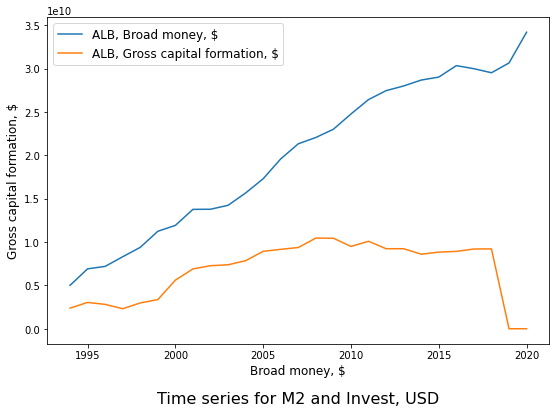

In [1848]:
#experiment with the country selected
#input your country code (from the list above)

ls=(df2.loc[:,['Name', 'Code']].sort_values('Name').to_numpy())
cn=ls[0,1]
ls=[(l[0], l[1]) for l in ls]

drdw=widgets.Dropdown(
    options=ls,
    value=cn,
    description='Name:',
    disabled=False,
)

zpl=0
def fill_pl(): 
      global z, ax, fig, zpl, cn
      i1=df[df['Country Code']==cn].index[0]   #M2
      i2=i1+3                                  #Inv
      z=df.iloc[[i1,i2],3:].T
      first=(z.iloc[:,0]>0).idxmax()
      z=z.loc[first:]
      z.dropna(how="any", inplace=True) 
      clear_output(wait=True)
      ax.clear()
      ax.set_xlabel("Broad money, $", fontsize=12)
      ax.set_ylabel("Gross capital formation, $", fontsize=12)
      ax.set_title('Time series for M2 and Invest, USD', fontsize=16, y=-0.2)
      display(drdw) 
      if not zpl: 
        zpl=ax.plot(z)
        ax.legend([f'{cn}, Broad money, $', f'{cn}, Gross capital formation, $'], fontsize=12)
      else: 
         ax.plot(z)
         ax.legend([f'{cn}, Broad money, $', f'{cn}, Gross capital formation, $'], fontsize=12)
         display(ax.figure)
         display(Javascript("Jupyter.notebook.execute_cells([10,11,12,13,14,15,16])"))
      
             
        
def on_value_change(change):
      global cn
      cn=change['new']
      fill_pl() 
      
            
drdw.observe(on_value_change, names='value')  
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1,1,1)
fill_pl()

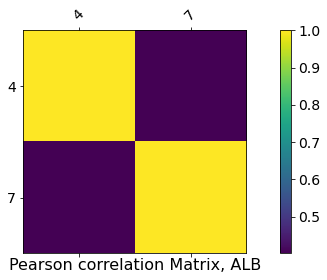

In [1849]:
f = plt.figure(figsize=(12, 4))
plt.matshow(z.corr(), fignum=f.number)
plt.xticks(range(z.select_dtypes(['number']).shape[1]), z.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(z.select_dtypes(['number']).shape[1]), z.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Pearson correlation Matrix, '+cn, fontsize=16, y=-0.1);

In [1850]:
print(f'\nPearson correlation for {cn} M2 and Investment')
pc=z.corr().reset_index(drop=True)
pc.columns=[0,1]
pc


Pearson correlation for ALB M2 and Investment


,0,1
0,1.000000,0.400811
1,0.400811,1.000000


In [1851]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
reg  = linear_model.LassoLars(alpha=.1, normalize=True)

In [1852]:
%%capture
data=z[:-1].to_numpy()
reg.fit(data[:,0,np.newaxis], data[:,1])

In [1853]:
s=data.shape[0]
m1=data[:,0].max()
m2=data[:,0].min()
mm=np.linspace(m2, m1, num=s)
pp=reg.predict(mm[:,np.newaxis])
k1=reg.coef_[0]
k0=reg.intercept_
r2=r2_score(data[:,1], pp)

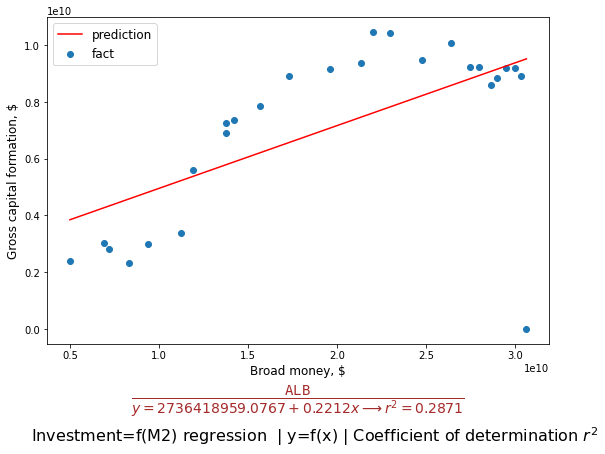

In [1854]:
plt.figure(figsize=(9, 6))
plt.scatter(data[:,0],data[:,1])
plt.plot(mm,pp, color='r')
tfy=r'$\frac{\mathtt{'+f'{cn}'+r'}}{'+f'y={k0:.4f}+{k1:.4f}x '+r'\longrightarrow r^2' +f'={r2:.4f}'+r'}$'
plt.title(tfy, y=-0.2, fontsize=20, color='brown')
plt.xlabel("Broad money, $", fontsize=12)
plt.ylabel("Gross capital formation, $", fontsize=12)
plt.legend(["prediction",'fact'], fontsize=12)
plt.text(x=0.1, y=-0.1, s='Investment=f(M2) regression  | y=f(x) | Coefficient of determination '+r'$r^2$', fontsize=16, transform=plt.gcf().transFigure);

In [1855]:
%%capture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import normalize
neigh = KNeighborsClassifier(n_neighbors=3)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.6, random_state=0)
X=normalize(df2.loc[:,['K','GDPpercap2019']].to_numpy(), axis=0)
y=df2.loc[:,['GOOD']].to_numpy().astype('int').ravel()
sss.get_n_splits(X, y)

In [1856]:
%%capture
for train_index, test_index in sss.split(X, y):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
neigh.fit(X_train, y_train)     

In [1857]:
x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/50), np.arange(y_min, y_max, (y_max-y_min)/50))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

Classification accuracy 0.92


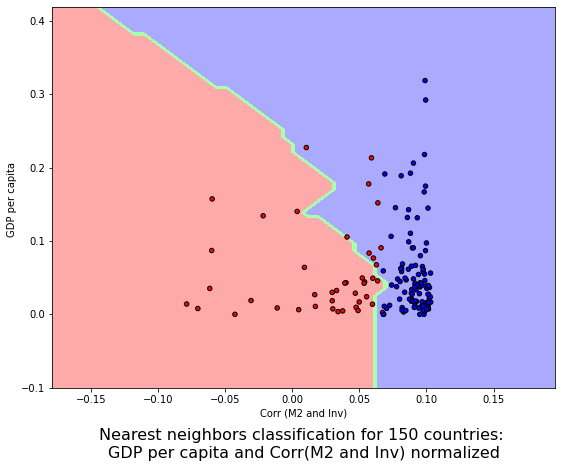

In [1858]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(9, 7))
plt.contourf(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Corr (M2 and Inv)')
plt.ylabel('GDP per capita ')
plt.title(f'Nearest neighbors classification for {len(df2)} countries: \nGDP per capita and Corr(M2 and Inv) normalized', fontsize=16, y=-0.2)
ce=1-sum(neigh.predict(X_test)-y_test)/y_test.shape[0]
print(f'Classification accuracy {ce:0.2f}')

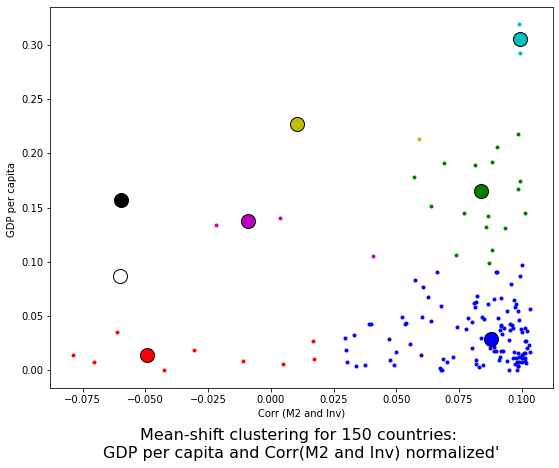

In [1859]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

plt.figure(figsize=(9, 7))
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

plt.subplot(111)
cdict={'b': 'blue','g': 'green','r': 'red','c': 'cyan','m': 'magenta','y': 'yellow','k': 'black','w': 'white'}
cmask=list(cdict.keys())
colors = cycle(cmask)
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.xlabel('Corr (M2 and Inv)')
plt.ylabel('GDP per capita ')
plt.title(f"Mean-shift clustering for {len(df2)} countries: \nGDP per capita and Corr(M2 and Inv) normalized'", fontsize=16, y=-0.2)

#count clusters
from collections import Counter
cntt=Counter(labels)
res=np.c_[X,labels]
cnt={k: v for k, v in sorted(cntt.items(), key=lambda item: item[1])}
mm=list(cnt.keys())[-1]                                                 #biggest claster name
mc=cntt[mm]                                                             #biggest claster size
df3 = pn.DataFrame(columns=['Name','Code','K','GDPpercap2019', 'GOOD']) #biggest claster content table
for i,v in enumerate(res): 
    if abs(v[2]-mm)<0.00001: df3.loc[len(df3)]=df2.iloc[i,:]

In [1860]:
print(f'The Biggest Cluster has color {cdict[cmask[mm]]} and contains {mc} or {mc/len(df2):.2%} of all countries')
print(f'Top of the Biggest Cluster is the following:')
#df3 =df3[df3['GDPpercap2019'] !=0]
df3.iloc[:,[0,2,3]].sort_values(by=['K'], ascending=False).reset_index(drop=True).T

The Biggest Cluster has color blue and contains 114 or 76.00% of all countries
Top of the Biggest Cluster is the following:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113
Name,Bangladesh,China,Morocco,Algeria,India,Bolivia,Rwanda,South Africa,Pakistan,Nepal,Tanzania,Philippines,Kyrgyz Republic,Ecuador,Uganda,Turkey,Kenya,Senegal,Cambodia,Peru,Kazakhstan,Burkina Faso,Colombia,Tajikistan,Niger,Botswana,Mozambique,Myanmar,Kuwait,Mali,Mexico,Zambia,Togo,Dominican Republic,Costa Rica,Mauritania,Benin,Indonesia,Paraguay,Chile,Sri Lanka,Bhutan,United Arab Emirates,Vietnam,Solomon Islands,North Macedonia,Mongolia,Honduras,Tunisia,Mauritius,Nicaragua,"Egypt, Arab Rep.",Moldova,"Congo, Rep.",Kosovo,Vanuatu,Georgia,Russian Federation,Ghana,Malaysia,El Salvador,Jordan,Angola,Cote d'Ivoire,Belarus,Guatemala,Cabo Verde,Antigua and Barbuda,Azerbaijan,Chad,Gabon,Namibia,Central African Republic,Uruguay,Guinea,Sierra Leone,Montenegro,Equatorial Guinea,Serbia,Maldives,Belize,Brazil,Fiji,Lebanon,Cameroon,Lesotho,Timor-Leste,Aruba,Oman,Thailand,Burundi,Croatia,Albania,Argentina,Bulgaria,Bosnia and Herzegovina,Sudan,Seychelles,Uzbekistan,Barbados,Ukraine,Suriname,Nigeria,Madagascar,Haiti,Eswatini,Armenia,"Iran, Islamic Rep.",Liberia,"Congo, Dem. Rep.",Iraq,"Gambia, The",West Bank and Gaza,Jamaica
K,0.993993,0.992802,0.991197,0.985042,0.983017,0.978616,0.9782,0.976757,0.975648,0.974478,0.97441,0.974262,0.971727,0.965381,0.964136,0.963198,0.962794,0.962394,0.962369,0.958855,0.956351,0.953747,0.95181,0.950887,0.950505,0.949366,0.94935,0.948565,0.945413,0.944041,0.940121,0.939346,0.938953,0.938897,0.934438,0.932034,0.929317,0.928784,0.927026,0.919934,0.917464,0.916601,0.915371,0.912716,0.907996,0.90601,0.895247,0.892208,0.888095,0.884494,0.883592,0.882024,0.881987,0.880824,0.878367,0.875822,0.870235,0.869112,0.862741,0.862626,0.861417,0.856988,0.856672,0.856032,0.855825,0.854654,0.841228,0.833468,0.817712,0.815123,0.809806,0.806716,0.799465,0.791162,0.788891,0.787935,0.785832,0.78507,0.778576,0.773742,0.770649,0.755927,0.748834,0.713543,0.698911,0.677678,0.660363,0.656598,0.653496,0.653303,0.648483,0.637538,0.612925,0.604151,0.582641,0.578227,0.575483,0.551358,0.533579,0.51964,0.515568,0.502699,0.480743,0.472437,0.45845,0.452615,0.385704,0.377466,0.361983,0.328563,0.318143,0.291011,0.286872,0.286316
GDPpercap2019,4818.094737,16410.797797,6916.346412,10681.679297,6121.314984,7931.754308,2098.710362,11466.189672,4622.770769,3302.817532,2635.335891,7953.581644,4706.570238,10329.198753,2177.595854,28384.987784,4220.440248,3300.085493,4191.850003,11260.845754,25337.152399,2160.51153,13441.492952,3473.844217,1196.87756,16040.008473,1229.080019,4544.021569,0.0,2216.773262,17887.750736,3270.035112,1588.60238,17003.013021,19017.789274,4983.220633,3323.144451,11444.960683,12339.195685,23325.389551,12536.941388,10909.100169,0.0,8200.331867,2482.87192,15848.419294,11470.673833,5138.385398,9727.473955,19469.524588,5280.140581,11951.447527,12324.736279,3475.522464,10776.095247,2762.791388,14089.302334,26456.387938,5318.76952,26435.171571,8056.543086,9816.554516,6198.083841,5174.100553,19148.175101,8388.390495,6045.060884,17956.315716,13699.66559,1519.912362,14399.868809,8788.008292,928.589508,20026.036536,2670.823355,1648.05336,18278.730792,17007.62478,18210.00462,13049.046653,6047.676218,14059.369598,10997.473483,11649.050112,3576.349499,2377.869901,3181.137188,0.0,0.0,17284.508292,731.06323,26465.12731,13295.410885,19686.523659,22383.805544,14339.831181,4022.865967,24361.893942,6994.169412,12870.042504,12377.017293,14444.1592,4916.721381,1510.141726,2773.081364,8392.717564,12592.635368,12433.296975,1353.84292,1072.210113,9473.669542,2159.441909,5394.071688,8739.986672


In [1861]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')